# Calculate Decile Index (DI) with Python

For countries such as Australia, with especially high interannual rainfall variability, Gibbs and Maher (1967) observed that the occurrence of annual rainfall in the first decile range for the period 1885–1965 corresponded very well with information on drought occurrence (Foley 1957). To aid this appraisal, it is noteworthy that Foley (1957) based “agricultural assessments” on newspaper and other reports of the effects of rainfall in the first decile range on crop yield and livestock numbers. As a consequence, the Australian Bureau of Meteorology now operationally identifies “rainfall deficiencies” rather than defining “droughts,” with a serious rainfall deficiency occurring when the rainfall total over a critical period lies between the 5th and 10th percentile, and a severe rainfall deficiency occurs when the total is below the 5th percentile (White and Walcott 2009). (This approach may also tend to overcome the inherent problems associated with the need for normalized rainfall distributions in the “percent of normal” drought index.)

Monthly precipitation totals from a long-term record are first ranked from highest to lowest to construct a cumulative frequency distribution. The distribution is then split into 10 parts (tenths of distribution or deciles). The first decile is the precipitation value not exceeded by the lowest 10% of all precipitation values in a record. The second decile is between the lowest 10 and 20% etc. Comparing the amount of precipitation in a month (or during a period of several months) with the long-term cumulative distribution of precipitation amounts in that period, the severity of drought can be assessed. 

The deciles are grouped into five classes, two deciles per class. If precipitation falls into the lowest 20% (deciles 1 and 2), it is classified as ***much below normal***. Deciles 3 to 4 (20 to 40%) indicate ***below normal*** precipitation, deciles 5 to 6 (40 to 60%) indicate ***near normal*** precipitation, 7 and 8 (60 to 80%) indicate ***above normal*** precipitation and 9 and 10 (80 to 100%) indicate ***much above normal*** precipitation. 

In [1]:
import pandas as pd
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare data

In [2]:
data = pd.read_csv('data/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

## Convert data into probabilities

In [3]:
data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

In [4]:
df_6mon['Prob'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon    
    x = df_6mon[sinds]       
    y = (x.rank()-1.0)/(len(x)-1.0)*100.0
   
    df_6mon.loc[sinds, 'Prob'] = y.values[:,0]

In [5]:
data['Prob'] = df_6mon['Prob']
del df_6mon
data.head(7)

,Rain,Rain_6,Prob
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,7.563025
1892-07-31,11.7,45.0,19.327731


Categorize probabilities with key threshlods of 20, 40, 60 and 80

Because we used all data, therefore each category should the same percentage of about 20%.

In [6]:
#bins = [20., 40., 60., 80., np.Inf]
#data['cats'] =data[['Prob']] .apply(mc.User_Defined.make(bins=bins, rolling=False))
#data.head(24)

In [7]:
# just used as validation
#mc.User_Defined(data.Prob.values, bins=bins)
#data[['cats']].groupby(data['cats']).count()
#data[['cats']].groupby([data.index.month, data['cats']]).count()

## Visualize monthly rainfall probabilities

(-936, 503)

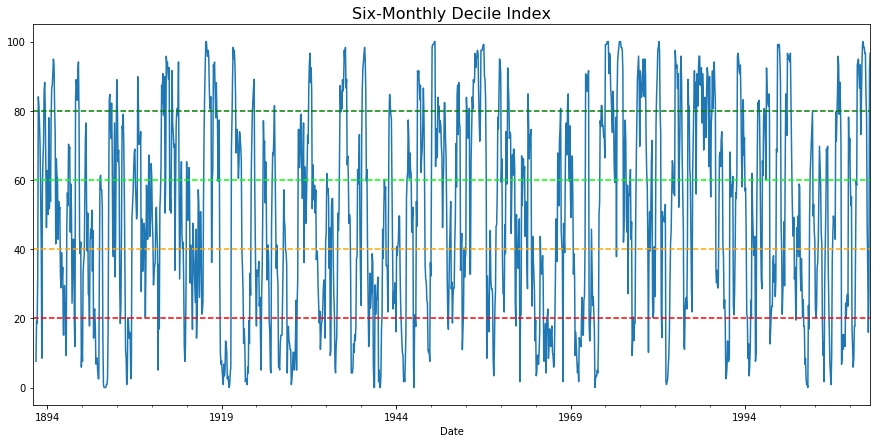

In [8]:
ax = data['Prob'].plot(figsize=(15, 7), )
ax.axhline(80, linestyle='--', color='g')
ax.axhline(60, linestyle='--', color='lime')
ax.axhline(40, linestyle='--', color='orange')
ax.axhline(20, linestyle='--', color='r')
ax.set_title('Six-Monthly Decile Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())

## Summary and discussion

Decile Index could easily be calculated with data and fewer assumptions than the Palmer Drought Severity Index (Smith et al. 1993, Hayes 2000). As part of Australian drought policy, growers and producers are advised to only seek exceptional drought assistance if the drought is shown to be an event that occurs only once in 20-25 years (deciles 1 and 2 over a 100-year record) and has lasted longer than 12 months (White and O’Meagher 1995, Hayes 2000).

## References

Gibbs, W.J. and J.V. Maher. 1967. Rainfall deciles as drought indicators. Bureau of Meteorology, Bulletin No. 48, Melbourne.

Hayes, M.J. 2000. Drought indices. National Drought Mitigation Center, University of Nebraska, Lincoln, Nebraska.

Smith, D.I., M.F. Hutchinson, and R.J. McArthur. 1993. Australian climatic and agricultural drought: Payments and policy. Drought Network News 5(3):11-12.

White, D.H. and B. O'Meagher. 1995. Coping with exceptional circumstances: Droughts in Australia. Drought Network News 7:13–17.